In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-oriya/language-model')

In [6]:
p = path.glob('OriyaWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [7]:
len(files)

17781

In [8]:
train_files, test_files = train_test_split(files, test_size=0.3)

In [9]:
len(train_files), len(test_files)

(12446, 5335)

In [10]:
train_files[0]

PosixPath('/home/gaurav/PycharmProjects/nlp-for-oriya/language-model/OriyaWikipediaArticles/2403.pkl')

In [11]:
str(train_files[0]).split('/')[-1][:-4]

'2403'

In [12]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'OriyaDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [13]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'OriyaDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [14]:
class OriyaTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/oriya_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [15]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/oriya_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

In [16]:
itos

['<unk>',
 '<s>',
 '</s>',
 '▁।',
 '▁',
 ',',
 'ରେ',
 'ର',
 '▁ଓ',
 '.',
 'କୁ',
 '▁ଏହି',
 '▁ଏକ',
 '▁ସେ',
 '।',
 'ରୁ',
 '▁ଏହା',
 '▁କରିଥିଲେ',
 'ଙ୍କ',
 '▁q',
 '୍',
 '▁�',
 '▁ମଧ୍ୟ',
 '▁ଏବଂ',
 '▁ପାଇଁ',
 'X',
 '-',
 'ା',
 '▁କରି',
 '▁ବା',
 '▁ପରେ',
 'ିତ',
 '▁ହୁଏ',
 '▁ଅଟେ',
 'ଙ୍କୁ',
 'ଟି',
 '▁ବର୍ଷ',
 'କ',
 '�',
 '%',
 'ନ',
 'ୀ',
 '▁ଏହାର',
 '▁ମସିହାରେ',
 '▁ରୋଗ',
 'ି',
 '▁ଭାରତୀୟ',
 'ମାନେ',
 '▁ଥିଲେ',
 ':',
 'େ',
 '▁ତାଙ୍କ',
 '▁"',
 '▁କରିବା',
 '▁ଜଣେ',
 '▁ଅନୁସାରେ',
 '▁ସମୟରେ',
 '▁ଥିବା',
 'ଦ୍ୱାରା',
 '▁ହୋଇ',
 '▁ଓଡ଼ିଆ',
 '▁ସହ',
 '▁ମନ୍ଦିର',
 '▁ତାଙ୍କର',
 '▁ଅଧିକ',
 '▁ଦିନ',
 '▁କରାଯାଏ',
 '▁ଥିଲା',
 '▁ରହିଛି',
 '▁ମଧ୍ୟରେ',
 '▁ଭାବରେ',
 '"',
 '▁ନ',
 '▁ସ',
 'ମ',
 "'",
 's',
 '▁ଭାବେ',
 '▁ଆରମ୍ଭ',
 '▁ଅନେକ',
 'ସ',
 '▁ହୋଇଥିଲା',
 '▁ପ୍ରଥମ',
 '▁ଉପରେ',
 '▁ବୋଲି',
 '▁ଅଭିନୟ',
 '▁ଅବସ୍ଥିତ',
 'ଲ',
 '▁ଅ',
 '▁ହୋଇଥାଏ',
 '▁ନାମ',
 '▁ଲୋକ',
 '▁ଆଦି',
 '▁ଯାହା',
 '▁ହେଲେ',
 '▁ଏ',
 '▁ବିଭିନ୍ନ',
 'ତା',
 '▁ହେଲା',
 '▁·',
 '▁କଲେ',
 '▁ହାର',
 '▁କିଛି',
 '▁ଅନ୍ୟ',
 '▁ସେହି',
 '▁ନିମନ୍ତେ',
 '▁ଜାତୀୟ',
 '▁ଗୋଟିଏ',
 '▁ଅଛି',
 'ୁ',
 '▁ନିଜ',
 '▁ଠାରୁ',
 '▁ସାଧାରଣ',


In [17]:
# 15,000 is the vocab size that we chose in sentencepiece
oriya_vocab = Vocab(itos)

In [18]:
tokenizer = Tokenizer(tok_func=OriyaTokenizer, lang='or')

In [19]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [20]:
data_lm = TextLMDataBunch.from_folder(path=path/'OriyaDataset', tokenizer=tokenizer, vocab=oriya_vocab)

In [21]:
data_lm.batch_size

64

In [22]:
data_lm.save()

In [23]:
data_lm.show_batch()

idx,text
0,▁x x b os ▁ହିଙ୍ଗୁଳା ▁ମନ୍ଦିର ▁ତାଳଚେର ▁ଗଡ଼ ର ▁ଗୋପାଳ ପ୍ରସାଦ ▁ଗ୍ରାମ ରେ ▁ଅବସ୍ଥିତ ▁। ▁ଏହି ▁ଅଗ୍ନୀ ରୂପା ▁ମା ’ ▁ପରମ ▁ବୈଷ୍ଣବ ୀ ▁ନାରାୟଣ ୀ ▁ଶୁ ମ୍ଭ ▁ନି ଶୁ ମ୍ବ ଙ୍କୁ ▁ବଧ ▁କରି ▁ସୁ ବଳ ▁ଓ ▁ଦୁ ନ୍ଦୁ ଭି ଙ୍କୁ ▁ମାରିବା କୁ ▁ଗଲା ବେଳେ ▁ତାଙ୍କ ▁ସହ ▁ଅଷ୍ଟ ▁ମହାବିଦ୍ୟା ▁ଯାଇଥିଲେ ▁। ▁ସେହି ▁ଅଷ୍ଟମ ହା ବିଦ୍ୟା ଙ୍କ ▁ମଧ୍ୟରେ ▁ମା ▁ହିଙ୍ଗୁଳା ▁ଅନ୍ୟତମ ▁। ▁ତାଳଚେର ସ୍ଥ ▁ଏହି ▁ପ୍ରସିଦ୍ଧ ▁ହିଙ୍ଗୁଳା ଙ୍କ ▁ସମ୍ପର୍କରେ ▁ଜନଶ୍ରୁତି ରୁ ▁ଜଣାଯାଏ
1,"▁କରାଯାଏ , ▁ତାହା ହେଲେ ▁ଆରୋଗ୍ୟ ▁ହୋଇଯାଏ ▁। ▁ଅପରେଶନ , ▁ରାଡିଏସନ ▁କିମ୍ବା ▁କେମୋଥେରାପି ର ▁ମ ଶ୍ ର ିତ ▁କରାଯାଏ ▁। ▁ଏହାର ▁ଫଳାଫଳ ▁ନିର୍ଭର ▁କରେ ▁କେତେ ▁ପର୍ଯ୍ୟନ୍ତ ▁ରୋଗ ▁ଆଗେଇ ଛି ▁ଓ ▁କେଉଁ ▁ଉପ - ପ୍ରକାର ର ▁ରୋଗ ▁। ▁ପାଞ୍ଚ ▁ବର୍ଷ ିଅ ▁ଆୟୁଷ ▁ହାର ▁ଆମେରିକାରେ ▁୪୫ ▁% ▁। ▁ବିକାଶଶୀଳ ▁ଦେଶମାନଙ୍କରେ ▁ଏହି ▁ହାର ▁ନିରାଶ ା ଜନ ▁କ ▁। ▁ପୃଥିବୀ ରେ ▁୨୦୧୨ ▁ମସିହାରେ ▁ଓଭାରି ▁କର୍କଟ ▁ରୋଗ ▁୨ ୩୯ . ୦୦୦ ▁ମହିଳାଙ୍କୁ ▁ହୋଇଥିଲା ▁ଓ ▁୧୫ ୨"
2,"▁ଶାରୀରିକ ▁ସନ୍ତୁଳନ ▁ହୁଏ ▁। ▁ଅପସ୍ମାର ▁ଓ ▁ମାନସିକ ▁ସମସ୍ୟା ▁ଥିବା ▁ଲୋକଙ୍କୁ ▁ଏହି ▁ଔଷଧ ▁ଦିଆଯାଏ ▁ନାହିଁ ▁। ▁ବାନ୍ତି , ▁ତରଳ ▁ଝାଡ଼ା , ▁ମୁଣ୍ଡବଥା ▁ଓ ▁ରାସ ▁ଆଦି ▁ସାଧାରଣ ▁ପାର୍ଶ୍ୱ ▁ପ୍ରତିକ୍ରିୟା ▁ମଧ୍ୟ ▁ଦେଖାଯାଏ ▁। ▁ଗର୍ଭାବସ୍ଥାରେ ▁ଅନ୍ୟ ▁କୌଣସି ▁ଉପାୟ ▁ନ ▁ଥିଲେ ▁ଏହା ▁ଦିଆଯାଇପାରେ ▁ଅନ୍ୟ ଥା ▁ଏହା ▁ଦିଆଯାଏ ▁ନାହିଁ ▁। ▁ସ୍ତନ୍ୟପାନ ▁ସମୟରେ ▁ଏହା ▁ଦିଆଯାଏ ▁ନାହିଁ ▁। ▁ଯୁକ୍ତରାଷ୍ଟ୍ର ▁ଆମେରିକାର ▁ସେନା ଦ୍ୱାରା ▁ସନ ▁୧୯୭୦ ରେ ▁ପ୍ରଥମେ ▁ମେ ଫ୍ଲୋ କ ୍ୱିନ ▁ପ୍ରସ୍ତୁତ ▁କରାଯାଇଥିଲା ▁ଓ ▁୧୯୮୦ ▁ମଦ୍ୟ ଭାଗରେ ▁ବ୍ୟବ ▁ହାର"
3,"ାଙ୍କ ▁ଗର୍ଭରୁ ▁ଜନ୍ମଗ୍ରହଣ ▁କରିଥିଲେ ▁। ▁ମତାନ୍ତର େ ▁ପ୍ରଜା ପିତା ▁ବ୍ରହ୍ମାଙ୍କ ▁ନାଭି ▁କମଳ ରୁ ▁ଦେବ ଶିଳ୍ପୀ ▁ବିଶ୍ୱକର୍ମାଙ୍କ ▁ଜନ୍ମ ▁। ▁ଚତୁର୍ଭୁଜ ▁ବିଶ୍ୱକର୍ମା , ▁ବାମ ▁ଉପର ▁ହାତ ରେ ▁ବଟା ଳି ▁ଓ ▁ବାମ ▁ତଳ ▁ହାତ ରେ ▁ମା ର୍ତ୍ତ ୁ ଲି , ▁ଦକ୍ଷିଣ ▁ଉପର ▁ହାତ ରେ ▁ଚକ୍ର ▁ଓ ▁ତଳ ▁ହାତ ରେ ▁ଆଶୀର୍ବାଦ ▁କରୁଥିବାର ▁ଦୃଷ୍ଟି ଗୋଚର ▁ହେଇ ଥାନ୍ତି ▁। ▁ଦିବ୍ୟ ▁ବସ୍ତ୍ର ▁ପରି ହିତ ▁ଗଳା ରେ ▁ରତ୍ନ ହାର , ▁ଅନୁପମ ▁ରତ୍ନ ଅ ଳଙ୍କାର ରେ ▁ ବିଭୂଷିତ ,"
4,▁ଚଳାଚଳ ▁ପାଇଁ ▁ସବ ସି ଡି ▁ମଧ୍ୟ ▁200 5 ▁ମସିହାରୁ ▁ 2008 ▁ମସିହା ▁ଯାଏ ▁ଦେଇଥିଲେ ▁। ▁ . 2008 ▁ମସିହାରୁ ▁ସବ ସି ଡି ▁ବନ୍ଦ ▁କରି ▁ସରକାର ▁ଡେକାନ ▁ଏୟାର ▁ବିମାନ ▁ଚଳେଇ ଥିଲେ ▁। ▁ପରେ ▁କି ଂ ଫି ଶ ର ▁ବିମାନ ▁ଚଳାଚଳ ▁କରିଥିଲା ▁। ▁ତାହା ▁ବନ୍ଦ ▁ହେଲା ▁ପରେ ▁ଆଉ ▁ବିମାନ ▁ସେବା ▁ରହି ନଥିଲା ▁। ▁ . ▁ବର୍ତମାନ ▁ଏୟାର ▁ଇଣ୍ଡିଆ ର ▁ଏକ ▁ବିମାନ ▁ଚଳାଚଳ ▁କରେ ▁। ▁2015 ▁ମସିହାରୁ ▁ଏହାକୁ ▁କର ଗୋ ▁ବିମାନ ▁ପାଇଁ ▁ଉପଯୁକ୍ତ


In [24]:
len(data_lm.vocab.itos)

15000

In [25]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '▁।': 3,
             '▁': 4,
             ',': 5,
             'ରେ': 6,
             'ର': 7,
             '▁ଓ': 8,
             '.': 9,
             'କୁ': 10,
             '▁ଏହି': 11,
             '▁ଏକ': 12,
             '▁ସେ': 13,
             '।': 14,
             'ରୁ': 15,
             '▁ଏହା': 16,
             '▁କରିଥିଲେ': 17,
             'ଙ୍କ': 18,
             '▁q': 19,
             '୍': 20,
             '▁�': 21,
             '▁ମଧ୍ୟ': 22,
             '▁ଏବଂ': 23,
             '▁ପାଇଁ': 24,
             'X': 25,
             '-': 26,
             'ା': 27,
             '▁କରି': 28,
             '▁ବା': 29,
             '▁ପରେ': 30,
             'ିତ': 31,
             '▁ହୁଏ': 32,
             '▁ଅଟେ': 33,
             'ଙ୍କୁ': 34,
             'ଟି': 35,
             '▁ବର୍ଷ': 36,
             'କ': 37,
             '�': 38,
             '%': 39,
             'ନ': 40,
             'ୀ': 41,


In [26]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [27]:
gc.collect()

0

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


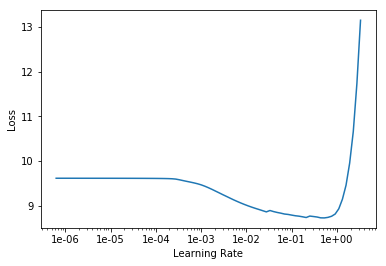

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.215199,5.155111,0.218434


In [31]:
learn.save('first', with_opt=True)

In [32]:
learn.load('first', with_opt=True);

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.821291,4.968831,0.230557
2,4.733251,4.740776,0.246780
3,4.377739,4.364820,0.293031
4,3.877823,4.030114,0.341245
5,3.652991,3.946535,0.354964


In [35]:
learn.save('second_or_lm', with_opt=True)

In [36]:
learn.load('second_or_lm', with_opt=True);

In [37]:
learn.fit_one_cycle(50, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.410607,3.940806,0.356176
2,3.236152,3.933805,0.357445
3,3.415622,3.921870,0.359300
4,3.413979,3.903940,0.361678
5,3.279636,3.884566,0.364997
6,3.328824,3.861917,0.368683
7,3.227978,3.837148,0.373246
8,3.265952,3.809445,0.378211
9,3.241844,3.779650,0.383241
10,3.182221,3.748941,0.388474


In [38]:
learn.save('third_or_lm', with_opt=True)

In [39]:
learn.load('third_or_lm', with_opt=True);

In [40]:
TEXT = "ଚଳାଚଳ ପାଇଁ"
N_WORDS = 40
N_SENTENCES = 2

In [42]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.5) for _ in range(N_SENTENCES)))

ଚଳାଚଳ ପାଇଁ ▁ଏହି ▁ବିଶେଷ ▁ପଦକ୍ଷେପ ▁ନିଆ ▁ଯାଇଛି ▁। ▁ଏହି ▁ସହର ରେ ▁ଯୋଗ ▁ଦେଇ ▁ଏକ ▁ଟ୍ରେନ ▁ବା ▁ଟ୍ରେନ ଦ୍ୱାରା ▁ପରିଚାଳିତ ▁ହୁଏ ▁। ▁ଏହି ▁ଟ୍ରେନ ▁ ▁ପୂର୍ବରୁ ▁ଟ୍ରେନ ▁ଯୋଗେ ▁ଟ୍ରେନ ▁କିମ୍ବା ▁ଟ୍ରେନ ▁ଯୋଗେ ▁ଯାତାୟାତ ▁କରେ ▁। ▁ଏହି ▁ଟ୍ରେନ ରେ ଲ ଜ ଲ ରେ ଲା
ଚଳାଚଳ ପାଇଁ ▁ପ୍ରଥମ ▁ଥର ▁ପାଇଁ ▁ଓଡ଼ିଶା ▁ସରକାରଙ୍କ ▁ଉଦ୍ଦେଶ୍ୟରେ ▁ପ୍ରସ୍ତାବ ▁ଦେଇଥିଲେ ▁। ▁ଓଡ଼ିଶା ▁ସରକାର ଙ୍କୁ ▁ମିଳୁଥିବା ▁ସର୍ବେକ୍ଷଣ ରୁ ▁ଓଡ଼ିଶା ▁ସରକାରଙ୍କ ▁ତରଫରୁ ▁୧୪ଟି ▁ଭିନ୍ନ ▁ଭିନ୍ନ ▁ସୂତ୍ର ▁ଯୋଗାଇ ▁ଆସୁଛନ୍ତି ▁। ▁ଓଡ଼ିଶା ▁ବ୍ୟତୀତ ▁ରାଜ୍ୟ ରେ ▁ଥିବା ▁ବିଭିନ୍ନ ▁ରାଜ୍ୟ ମାନଙ୍କୁ ▁ନେଇ ▁ଗଠିତ ▁ଏହି ▁କମିଟି ▁ଓଡ଼ିଶାର ▁ପ୍ରଥମ ▁ସର୍ବ


In [43]:
np.exp(3.28)

26.575772699873955